# Week 3 - Class 3

This notebook have the most important exercises data wrangling operations for the data used in this course

- Text
- Numbers
- Images Segmentation
- Images

# Text

Your dataset information:

https://keras.io/api/datasets/imdb/

dataset of 25,000 movies reviews from IMDB
abeled by sentiment (positive/negative): see set(train_labels)
each review is encoded as a list of word indexes (integers): see train_data[0] for example

the integer "5" encodes the 5th most frequent word in the data
## Zero (0)
"0" does not stand for a specific word, but instead is used to encode the pad token
Padding is add the zeros at the end of the sequence to make the samples in the same size

maxlen: int or None. Maximum sequence length. Any longer sequence will be truncated. Defaults to None, which means no truncation. None== length of the longest sentence, then truncation never happens

## One (1)
Start of sentence

In [1]:
from tensorflow.keras.datasets import imdb
# These are the default parameters
start_char = 1
oov_char = 2
index_from = 3 #start_char+oov_char

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


The '3-index shift issue': see the load_data() and the get_word_index() as two separate functions. 

The load_data has special parameters, such as having reserved the 1 and 2 indexes for start_char and oov_char, respectively. 

The get_word_index gives the indexes of the words by overall frequency in the dataset, being the 1, the most frequent word in the dataset. This is independent from the load_data() function. 

When we load the data, we can choose to drop x-first indexes, the most frequent words. With a index_from, are saying to the function: 'give me the indexes of words shift +3'. Because of this, when converting the index to words, we need to subtract 3. 

In [2]:
start_char = 1
oov_char = 2
index_from = 0 

(x_train0, _), _ = imdb.load_data(start_char=start_char, oov_char=oov_char, index_from=index_from)

index_from = 3 #re assigning 
(x_train3, _), _ = imdb.load_data(start_char=start_char, oov_char=oov_char, index_from=index_from)

print('zero:',x_train0[0][0:4]) #print first sample of train, for the first 5 words
print('3-indx:',x_train3[0][0:4])


zero: [1, 11, 19, 13]
3-indx: [1, 14, 22, 16]


In [3]:
start_char = 1
oov_char = 2
index_from = 0 #start_char+oov_char

(x_train, _), _ = imdb.load_data(start_char=start_char, oov_char=oov_char, index_from=index_from)

x_train[0][0:4]


[1, 11, 19, 13]

To obtain the words, from the word index, we can subtract 3 from the train data index, or sum 3 from the word index

In [4]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# see the word index sorted
#{k: v for k, v in sorted(word_index.items(), key=lambda item: item[1])}


1641221/1641221 [==============================] - 0s 0us/step


### Sum to word index example

In [5]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

In [6]:
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited [START] part they played [OOV] you could just imagine being there robert redford's is an amazing actor [OOV] now [START] same being director norman's father came from [START] same scottish island as myself so i loved [START] fact there was a real connection with this film [START] witty remarks throughout [START] film were great it was just brilliant so much that i bought [START] film as soon as it was released for retail [OOV] would recommend it to everyone to watch [OOV] [START] fly fishing was amazing really cried at [START] end it was so sad [OOV] you know what they say if you cry at a film it must have been good [OOV] this definitely was also congratulations to [START] two little boy's that played [START] part's of norman [OOV] paul they were just brilliant children are often left out of [START] praising list i think because [START] stars that play them all grown up are such a bi

### Substract to train_data

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [8]:
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited [START] part they played [OOV] you could just imagine being there robert redford's is an amazing actor [OOV] now [START] same being director norman's father came from [START] same scottish island as myself so i loved [START] fact there was a real connection with this film [START] witty remarks throughout [START] film were great it was just brilliant so much that i bought [START] film as soon as it was released for retail [OOV] would recommend it to everyone to watch [OOV] [START] fly fishing was amazing really cried at [START] end it was so sad [OOV] you know what they say if you cry at a film it must have been good [OOV] this definitely was also congratulations to [START] two little boy's that played [START] part's of norman [OOV] paul they were just brilliant children are often left out of [START] praising list i think because [START] stars that play them all grown up are such a bi

In [9]:
# check the number of samples in training and testing dataset

print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)

(25000,) (25000,)
(25000,) (25000,)


In [10]:
# check the size of training and testing dataset for one sample

print(len(train_data[1]), train_labels[0])
print(len(test_data[1]), test_labels[0])

189 1
260 0


In [11]:
# check the maximum length in the data

max([max(sequence) for sequence in train_data])


9999

In [12]:
import numpy as np

#create a function to transfor list of word-indexes to vectors
def vectorize_sequences(sequences, dimension=10000):
    #start by create the placeholder for the word vectors
    #np.zeros(rows, columns)-> array with zeros with rows=nb of samples and columns=vocabulary dimension
    results = np.zeros((len(sequences), dimension))
    #for each row, give an i (index) and the sequence itself
    for i, sequence in enumerate(sequences):
        #inside the sequence, j will go through the columns
        for j in sequence:
            #for i (the sequence number) and j (the column in that sequence), assign 1 to that cell in results
            #results for row i, in j column will have a 1, if sequence i has j in its values
            results[i, j] = 1.
    return results


In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Numbers

In [16]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [17]:
train_data.shape

(404, 13)

In [18]:
test_data.shape

(102, 13)

In [19]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [20]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Images Segmentation

Get the images from these two links and extract them:
http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz 

In [21]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2023-03-28 15:37:10--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-03-28 15:37:11--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-03-28 15:37:11--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [22]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2023-03-28 15:37:40--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2023-03-28 15:37:40--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2023-03-28 15:37:40--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

Do a list of images paths and of target paths

In [23]:
import os

input_dir = "images/"
target_dir = "annotations/trimaps/"

input_img_paths = sorted(
    [os.path.join(input_dir, fname)
     for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])
target_paths = sorted(
    [os.path.join(target_dir, fname)
     for fname in os.listdir(target_dir)
     if fname.endswith(".png") and not fname.startswith(".")])

Plot the image 10th

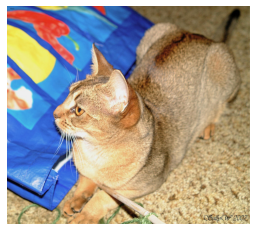

In [24]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

Plot its target

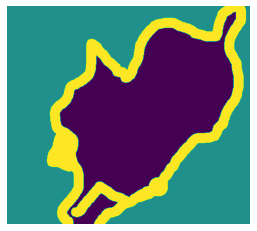

In [25]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(img)

How to load an image to a numeric tensor!

In [26]:
import numpy as np
import random

img_size = (200, 200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

# Images

In [27]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip


 98% 793M/812M [00:04<00:00, 244MB/s]
100% 812M/812M [00:04<00:00, 204MB/s]


Create directories and datasets

In [28]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
